In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from scipy import linalg as la
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
np.random.seed(1234)


1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [2]:
mu_1, sigma_1 = 0, 1
mu_2, sigma_2 = 0, 3
n = 1000
x1 = np.random.normal(mu_1, sigma_1, n)
x2 = x1 + np.random.normal(mu_2, sigma_2, n)
x3 = 2  * x1 + x2 

In [3]:
df= pd.DataFrame({"feature1":x1,"feature2":x2, "feature3":x3})
df

,feature1,feature2,feature3
0,0.471435,-4.275189,-3.332319
1,-1.190976,-6.051546,-8.433498
2,1.432707,1.572393,4.437807
3,-0.312652,-5.352138,-5.977442
4,-0.720589,3.467088,2.025911
...,...,...,...
995,0.272164,2.169901,2.714229
996,0.931546,6.971691,8.834783
997,0.327532,2.671921,3.326986
998,0.740814,7.182269,8.663897


In [4]:
cov_matrix=np.cov(df.T)
print(cov_matrix)

[[ 0.94780563  0.97706169  2.87267296]
 [ 0.97706169  9.85517837 11.80930174]
 [ 2.87267296 11.80930174 17.55464765]]


In [5]:
eigen_vals, eigen_vecs, = la.eig(cov_matrix)
print(f"The eigenvalues of the covariance matrix are:\n{eigen_vals}\n")
print(f"The eigenvectors of the covariance matrix are:\n{eigen_vecs}")


The eigenvalues of the covariance matrix are:
[2.64557028e+01+0.j 5.12666981e-16+0.j 1.90192884e+00+0.j]

The eigenvectors of the covariance matrix are:
[[-0.11305445 -0.81649658  0.56617314]
 [-0.5803632  -0.40824829 -0.704636  ]
 [-0.8064721   0.40824829  0.42771029]]


In [6]:
U, D, Vt = la.svd(df.T)
eigenvals_svd = D**2/(n-1)
#eigenvals_svd = D**2
eigenvecs_svd = U
print(f"The eigenvalues of the covariance matrix are:\n{eigenvals_svd}\n")
print(f"The eigenvectors of the covariance matrix are:\n{eigenvecs_svd}")


The eigenvalues of the covariance matrix are:
[2.65053699e+01 1.90220668e+00 2.06064656e-31]

The eigenvectors of the covariance matrix are:
[[-0.11296888  0.56619022 -0.81649658]
 [-0.58046969 -0.70454827 -0.40824829]
 [-0.80640745  0.42783217  0.40824829]]


In [7]:
#To check for the two procedure yeild the same result we sort the first eigenvector in the decending order 
idx = eigen_vals.argsort()[::-1]   
eigen_values = eigen_vals[idx]
eigen_vectors = eigen_vecs[:,idx]
print(eigen_values)
print(eigen_vectors)

[2.64557028e+01+0.j 1.90192884e+00+0.j 5.12666981e-16+0.j]
[[-0.11305445  0.56617314 -0.81649658]
 [-0.5803632  -0.704636   -0.40824829]
 [-0.8064721   0.42771029  0.40824829]]


In [8]:
df_ss = StandardScaler().fit_transform(df)

In [145]:
pca = PCA(n_components=3)
pca.fit_transform(df)
print(f"Variance of the dataset\n{pca.explained_variance_}\n")
print(f"Variance ratio of the dataset\n{pca.explained_variance_ratio_}\n")


Variance of the dataset
[2.64557028e+01 1.90192884e+00 3.98765340e-32]

Variance ratio of the dataset
[9.32930618e-01 6.70693825e-02 1.40620114e-33]



In [10]:
#To retain 99% of the total variability
new_pca = PCA(0.99)
new_pca = new_pca.fit_transform(df)
df_new = pd.DataFrame(new_pca, columns=['new_feature1', 'new_feature2'])
df_new


,new_feature1,new_feature2
0,-5.338035,-1.870776
1,-10.670869,0.000578
2,4.430752,-1.617968
3,-8.184920,-1.054358
4,3.341797,1.967833
...,...,...
995,3.256302,0.197318
996,11.053686,0.589684
997,4.048086,0.257629
998,11.016520,0.919142


In [11]:
principal_com = pca.fit_transform(df)

In [53]:
df_principal = pd.DataFrame(principal_com, columns = ['principal_component 1', 
                                                      'principal_component 2','principal_component 3'])
df_principal

,principal_component 1,principal_component 2,principal_component 3
0,-5.338035,-1.870776,1.242309e-15
1,-10.670869,0.000578,2.381480e-15
2,4.430752,-1.617968,-4.839006e-17
3,-8.184920,-1.054358,-4.770344e-16
4,3.341797,1.967833,4.226818e-17
...,...,...,...
995,3.256302,0.197318,-2.228172e-16
996,11.053686,0.589684,5.196536e-16
997,4.048086,0.257629,-1.526868e-17
998,11.016520,0.919142,1.305803e-16


C:\Users\media\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\media\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\media\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\media\anacond

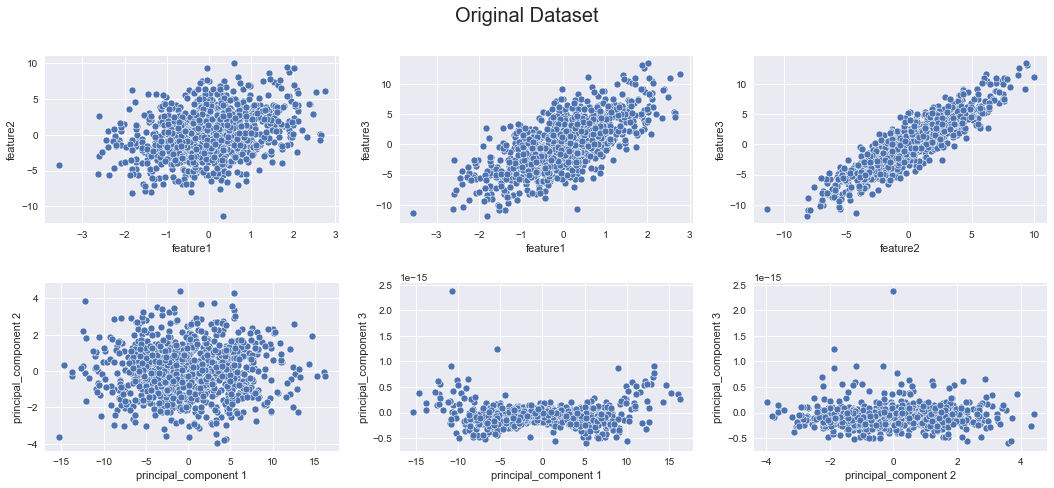

In [49]:
#Plot the data points in the original and the new coordiantes as a set of scatter plots.
#Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.
import seaborn as sns

fig, ax = plt.subplots(2, 3, figsize=(15, 7))
sns.scatterplot(df['feature1'], df['feature2'],ax=ax[0,0]);
sns.scatterplot(df['feature1'], df['feature3'],ax=ax[0,1]);
sns.scatterplot(df['feature2'], df['feature3'],ax=ax[0,2]);
fig.suptitle('Original Dataset', fontsize = 20);

sns.scatterplot(df_principal['principal_component 1'], df_principal['principal_component 2'],ax=ax[1,0]);
sns.scatterplot(df_principal['principal_component 1'], df_principal['principal_component 3'],ax=ax[1,1]);
sns.scatterplot(df_principal['principal_component 2'], df_principal['principal_component 3'],ax=ax[1,2]);

plt.tight_layout(pad=2);
plt.show()


2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [123]:
df_noise = df.copy()
mu_4, sigma_4 = 0,  np.random.uniform(0,1)/50
n = 1000
noise_varibles = 10
for i in range(1, noise_varibles+1):
    x_noise = np.random.normal(mu_4, sigma_4, n)
    df_noise['noise'+str(i)]= pd.DataFrame(x_noise)
df_noise.head(15)

,feature1,feature2,feature3,noise1,noise2,noise3,noise4,noise5,noise6,noise7,noise8,noise9,noise10
0,0.471435,-4.275189,-3.332319,0.012648,-0.008389,0.006252,-0.003221,-0.005140,0.000787,0.006903,-0.001021,0.023568,-0.001266
1,-1.190976,-6.051546,-8.433498,-0.002042,-0.000842,0.004979,0.001690,0.005317,-0.008834,-0.005646,0.011030,-0.014367,0.005003
2,1.432707,1.572393,4.437807,-0.000352,-0.002535,-0.003016,-0.003420,0.008314,0.015178,0.009964,-0.004096,-0.008920,-0.019649
3,-0.312652,-5.352138,-5.977442,-0.003269,-0.012139,-0.000541,0.011148,0.000436,-0.009774,0.011366,0.012818,0.008490,-0.000598
4,-0.720589,3.467088,2.025911,0.009674,-0.021728,-0.003294,0.002705,0.004747,0.001169,0.006337,0.001341,0.007204,0.008160
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.272164,2.169901,2.714229,-0.005499,0.003372,0.004956,0.014340,0.003296,-0.008791,-0.004272,-0.004923,-0.003755,0.005486
996,0.931546,6.971691,8.834783,0.015054,-0.004964,-0.002269,-0.006920,-0.000841,-0.000937,0.004805,0.010319,0.002492,-0.001056
997,0.327532,2.671921,3.326986,-0.006187,0.006871,0.000583,0.005676,0.011615,0.005270,0.019000,0.000343,0.013597,-0.008726
998,0.740814,7.182269,8.663897,0.003472,0.000080,-0.017424,0.004396,-0.004923,-0.001915,0.008148,-0.002145,0.004362,-0.001390


In [124]:
eigen_vals_noise, eigen_vecs_noise, = la.eig(np.cov(df_noise.T))
print(f"The eigenvalues of the covariance matrix are:\n{eigen_vals_noise}\n")
print(f"The eigenvectors of the covariance matrix are:\n{eigen_vecs_noise}")


The eigenvalues of the covariance matrix are:
[2.64557041e+01+0.j 1.90192925e+00+0.j 3.84689482e-16+0.j
 6.65974979e-05+0.j 9.31755011e-05+0.j 9.07089453e-05+0.j
 8.98451671e-05+0.j 8.64658169e-05+0.j 7.05393280e-05+0.j
 7.27718684e-05+0.j 8.20138683e-05+0.j 7.66763585e-05+0.j
 7.85884419e-05+0.j]

The eigenvectors of the covariance matrix are:
[[ 1.13054446e-01  5.66173077e-01  8.16496581e-01  1.03643908e-05
   1.36755110e-04  1.39357715e-04 -9.37166416e-05 -7.04043202e-05
   3.59262779e-05 -4.23306460e-05  6.27139370e-05 -1.16801332e-04
  -5.54139060e-06]
 [ 5.80363187e-01 -7.04635934e-01  4.08248290e-01 -1.70089765e-06
  -1.39976581e-04 -1.37150061e-04  1.45048606e-04  1.33305612e-04
  -3.72741942e-05 -2.88329350e-05 -1.36676761e-06  1.31830994e-04
   8.88733858e-05]
 [ 8.06472080e-01  4.27710219e-01 -4.08248290e-01  1.90278839e-05
   1.33533640e-04  1.41565369e-04 -4.23846769e-05 -7.50302804e-06
   3.45783617e-05 -1.13494227e-04  1.24061106e-04 -1.01771669e-04
   7.77906046e-05]
 [

In [125]:
U, D, Vt = la.svd(df_noise.T)
eigenvals_noise_svd = D**2/(n-1)
#eigenvals_svd = D**2
eigenvecs_noise_svd = U
print(f"The eigenvalues of the covariance matrix are:\n{eigenvals_noise_svd}\n")
print(f"The eigenvectors of the covariance matrix are:\n{eigenvecs_noise_svd}")


The eigenvalues of the covariance matrix are:
[2.65053711e+01 1.90220710e+00 9.31788160e-05 9.08096202e-05
 8.98532745e-05 8.64906636e-05 8.20328258e-05 7.87969666e-05
 7.69526866e-05 7.28400619e-05 7.06182463e-05 6.66505292e-05
 9.22314634e-32]

The eigenvectors of the covariance matrix are:
[[-1.12968874e-01  5.66190157e-01 -1.38108610e-04  1.38229048e-04
  -9.73891812e-05  7.01785340e-05 -6.16210761e-05  1.95300497e-05
   1.13471372e-04 -4.73677444e-05  3.69917710e-05 -1.02908624e-05
   8.16496581e-01]
 [-5.80469679e-01 -7.04548208e-01  1.42017224e-04 -1.39222879e-04
   1.47238447e-04 -1.35831723e-04 -2.53877747e-06 -1.07516421e-04
  -1.22447834e-04 -2.31149139e-05 -4.05222424e-05  1.74720494e-06
   4.08248290e-01]
 [-8.06407426e-01  4.27832105e-01 -1.34199996e-04  1.37235216e-04
  -4.75399152e-05  4.52534466e-06 -1.25780930e-04 -6.84563221e-05
   1.04494911e-04 -1.17850403e-04  3.34612996e-05 -1.88345198e-05
  -4.08248290e-01]
 [ 5.58153024e-06  3.02375042e-04  5.44410229e-01  8.89

In [128]:
df_noise_ss = StandardScaler().fit_transform(df_noise)

In [146]:
pca = PCA()
pca.fit_transform(df_noise)
print(f"Variance of the noise dataset\n{ pca.explained_variance_}\n")

print(f"Variance ratio of the noise dataset\n{ pca.explained_variance_ratio_}")


Variance of the noise dataset
[2.64557041e+01 1.90192925e+00 9.31755011e-05 9.07089453e-05
 8.98451671e-05 8.64658169e-05 8.20138683e-05 7.85884419e-05
 7.66763585e-05 7.27718684e-05 7.05393280e-05 6.65974979e-05
 9.59697083e-32]

Variance ratio of the noise dataset
[9.32904046e-01 6.70674835e-02 3.28563556e-06 3.19865772e-06
 3.16819842e-06 3.04903284e-06 2.89204435e-06 2.77125399e-06
 2.70382844e-06 2.56614491e-06 2.48741913e-06 2.34841889e-06
 3.38416732e-33]


looking at the variance in the first two features which contain the most significant part of both dataset, this shows that the noice has less or no impact on the data significant features of the orginal dataset. 

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

In [51]:
file_name= 'magic04.data' 
data = pd.read_csv(file_name, nrows=1000)
data.columns=['fLength','fWidth','fSize',
        'fConc','fConc1','fAsym',
        'fM3Long','fM3Trans','fAlpha','fDist','class']

data.drop(columns=['class'], inplace= True)
data.head(15)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980
5,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870
6,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340
7,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260
8,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510
9,62.7766,29.9104,3.3331,0.2475,0.1261,-33.9065,57.5848,23.7710,9.9144,323.0940


In [150]:

data_ss = StandardScaler().fit_transform(data)
data_pca = PCA(n_components=3, svd_solver='full')
data_pca= data_pca.fit_transform(data)
data_new = pd.DataFrame(data_pca, columns = ['A', 'B', 'C'])
data_new


,A,B,C
0,9.848514,22.917416,-14.807242
1,58.782926,74.641543,-91.636836
2,-80.871107,7.762362,-13.585509
3,168.484245,3.631586,-24.705883
4,46.104490,56.358338,-13.638317
...,...,...,...
995,-14.509201,-27.952254,-13.741034
996,-7.364562,55.277167,-2.837551
997,-93.146192,-44.377669,-0.346106
998,-59.580481,1.407762,-2.467302
